In [2]:
import sys
sys.path.append('../tranception_pytorch')

import util
import matplotlib.pyplot as plt

Text(0, 0.5, 'Learning rate')

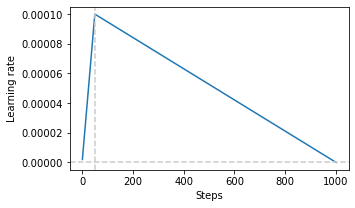

In [19]:
import torch

num_annealing_steps, num_total_steps = 50, 1000

optimizer = torch.optim.AdamW([torch.nn.Parameter(torch.randn(1))], lr=1e-4)
scheduler = util.LinearAnnealingLR(optimizer, num_annealing_steps=num_annealing_steps, num_total_steps=num_total_steps)

lrs = []
for _ in range(num_total_steps):
    lrs.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
    
fig = plt.figure(figsize=(5, 3))
plt.plot(range(1, num_total_steps+1), lrs)
plt.axhline(0, c='0.8', ls='--')
plt.axvline(num_annealing_steps, c='0.8', ls='--')
plt.xlabel('Steps')
plt.ylabel('Learning rate')